In [1]:
import os
import pprint
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
output_files = {
    'rnn': 'rnn/71785514/batch-size=128_dense-dropout=0.5_dense-layers=1_lr-high=0.5_lr-low=0.01_max-len=300_rnn-dropout=0.2_rnn-size=500_vectors=glove.42B.300d_vocab-size=30000/test.csv',
    'cnn': 'cnn/71785514/batch-size=256_conv-blocks=1_conv-dropout=0.1_dense-dropout=0.5_dense-layers=1_lr-high=0.01_lr-low=0.001_max-len=400_vectors=glove.42B.300d_vocab-size=50000/test.csv',
    'mlp': 'mlp/71785514/batch-size=512_hidden-dropout=0.5_hidden-layers=2_hidden-units=600_input-dropout=0.1_lr-high=0.3_lr-low=0.1_max-len=600_vectors=glove.42B.300d_vocab-size=100000/test.csv',
    'xgb': 'xgb/71785514/learning-rate=0.1_max-depth=6_max-len=1000_min-df=5_vocab-size=300000/test.csv',
}
results = {}
for model in ['rnn', 'cnn', 'mlp', 'xgb']:
    df = pd.read_csv(os.path.join('../output/', output_files[model])).sort_values('id')
    results[model] = df

              toxic - kendall              
          cnn       mlp       rnn       xgb
cnn  1.000000  0.702770  0.792532  0.657521
mlp  0.702770  1.000000  0.739622  0.590655
rnn  0.792532  0.739622  1.000000  0.651756
xgb  0.657521  0.590655  0.651756  1.000000 


           severe_toxic - kendall          
          cnn       mlp       rnn       xgb
cnn  1.000000  0.662518  0.783941  0.546249
mlp  0.662518  1.000000  0.696396  0.421474
rnn  0.783941  0.696396  1.000000  0.538140
xgb  0.546249  0.421474  0.538140  1.000000 


             obscene - kendall             
          cnn       mlp       rnn       xgb
cnn  1.000000  0.667584  0.764259  0.627479
mlp  0.667584  1.000000  0.676912  0.507591
rnn  0.764259  0.676912  1.000000  0.615831
xgb  0.627479  0.507591  0.615831  1.000000 


              threat - kendall             
          cnn       mlp       rnn       xgb
cnn  1.000000  0.609666  0.723087  0.464795
mlp  0.609666  1.000000  0.673433  0.366847
rnn  0.723087  0.673433

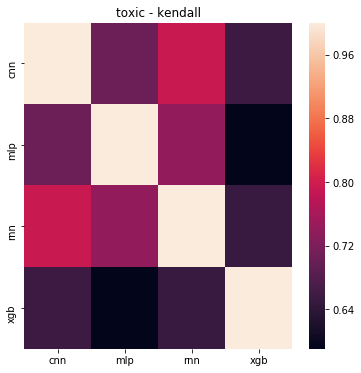

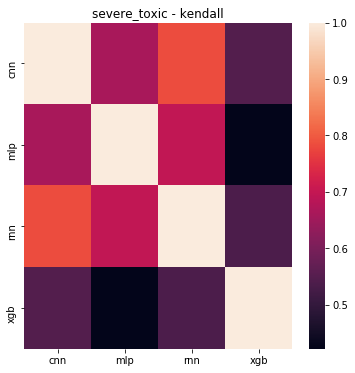

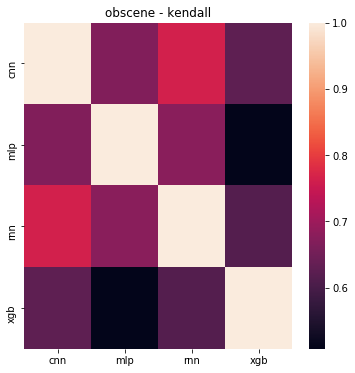

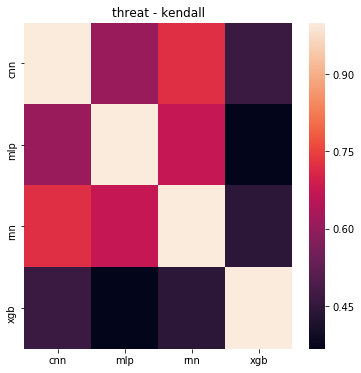

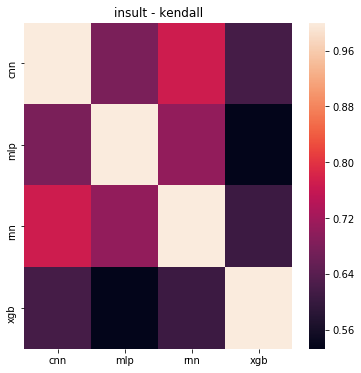

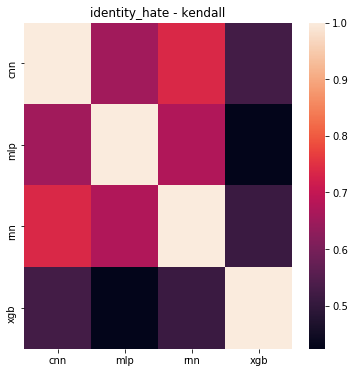

In [3]:
for label in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    d = {}
    for model in ['rnn', 'cnn', 'mlp', 'xgb']:
        r = results[model]
        d[model] = r[label]
    for method in ['kendall']:
        title = f'{label} - {method}'
        corr = pd.DataFrame.from_dict(d).corr(method=method)
        plt.figure(figsize=(6, 6))            
        plt.title(title)
        sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
        print(title.center(43))
        print(corr, '\n\n')